### Import packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction import DictVectorizer
from math import sqrt

### Loading the dataset

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-03 21:29:46--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.08s   

2023-10-03 21:29:46 (18.6 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [ ]:
df = pd.read_csv("/content/data.csv", encoding = "utf-8")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Data preparation

In [ ]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
features = ["make", "model", "year", "engine_hp", "engine_cylinders", "transmission_type", "vehicle_style", "highway_mpg", "city_mpg", "msrp"]
df = df[features]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [ ]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [ ]:
df = df.rename({"msrp": "price"}, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [ ]:
avg_price = df.price.mean()
avg_price

40594.737032063116

In [ ]:
above_average = (df.price >= avg_price).astype(int)
above_average

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: price, Length: 11914, dtype: int64

In [ ]:
df["above_average"] = above_average
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


### Create validation framework

In [ ]:
def create_valid_framework(df, y_label_name, random_state=1):
  df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
  df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

  print(len(df_train), len(df_val), len(df_test))

  df_train = df_train.reset_index(drop=True)
  df_test = df_test.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)

  y_train = df_train[y_label_name].values
  y_test = df_test[y_label_name].values
  y_val = df_val[y_label_name].values

  return df_train, df_val, df_test, y_train, y_val, y_test


In [ ]:
df_train, df_val, df_test, y_train, y_val, y_test = create_valid_framework(df=df, y_label_name="above_average", random_state=1)

7148 2383 2383


In [ ]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,50485,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,26840,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,36490,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,43575,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,22595,0


In [ ]:
del df_train["price"]
del df_train["above_average"]

del df_test["price"]
del df_test["above_average"]

del df_val["price"]
del df_val["above_average"]

In [ ]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17


Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

* For each numerical variable, use it as score and compute AUC with the above_average variable
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [ ]:
# Assuming df_train is your training DataFrame and 'above_average' is the target variable y_train

# List to store feature importance results
feature_importance = []

# Iterate through numerical columns
for column in df_train.select_dtypes(include=['number']).columns:
    auc_score = roc_auc_score(y_train, df_train[column])

    # Check if AUC is less than 0.5, invert the variable if needed
    if auc_score < 0.5:
        inverted_column = '-' + column
        auc_score = roc_auc_score(y_train, -df_train[column])
        feature_importance.append((inverted_column, auc_score))
    else:
        feature_importance.append((column, auc_score))

# Sort feature importance by AUC score in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importance results
for feature, auc_score in feature_importance:
    print(f"Variable: {feature}, ROC AUC Score: {auc_score}")

Variable: engine_hp, ROC AUC Score: 0.9171031265539011
Variable: engine_cylinders, ROC AUC Score: 0.766116490165669
Variable: year, ROC AUC Score: 0.687551492804683
Variable: -city_mpg, ROC AUC Score: 0.6734244643245233
Variable: -highway_mpg, ROC AUC Score: 0.6330587871772013


Which numerical variable (among the following 4) has the highest AUC?

* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg



---
Answer Q.1

---
**engine_hp**



Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

*LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)*

In [ ]:
def one_hot_encoding(train_df, val_df, test_df=""):
  train_dicts = train_df.to_dict(orient="records")
  val_dicts = val_df.to_dict(orient="records")
  if len(test_df)>0:
    test_dicts = test_df.to_dict(orient="records")

  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(train_dicts)
  X_val = dv.transform(val_dicts)
  if len(test_df)>0:
    X_test = dv.transform(test_dicts)
    return X_train, X_val, X_test
  else:
    return X_train, X_val


In [ ]:
def train_logistic_model(X_train, X_val, X_test, y_train, y_val, y_test, solver="liblinear", C=1.0, max_iter=1000, random_state=1, evaluation_on="valid"):
  # Initialize and train the logistic regression model
  model = LogisticRegression(solver=solver, C=C, max_iter=max_iter, random_state=random_state)
  model.fit(X_train, y_train)

  def get_accuracy_score(X, y):
    # Predict on the validation set
    predictions = model.predict(X)
    predict_probabilities = model.predict_proba(X)

    # Calculate accuracy
    accuracy = accuracy_score(y, predictions)
    return accuracy, predictions, predict_probabilities
  if evaluation_on == "valid":
    return get_accuracy_score(X_val, y_val)
  elif evaluation_on == "test":
    return get_accuracy_score(X_test, y_test)

In [ ]:
X_train, X_val, X_test = one_hot_encoding(df_train, df_val, df_test)

In [ ]:
accuracy, predictions, predict_probabilities = train_logistic_model(X_train, X_val, X_test, y_train, y_val, y_test, solver="liblinear", C=1.0, max_iter=1000, evaluation_on="valid")

In [ ]:
print("Accuracy score: ", round(accuracy, 3))

Accuracy score:  0.935


What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.678
* 0.779
* 0.878
* 0.979


---
Answer Q.2

---
**0.935 (~0.979)**



Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [ ]:
# Initialize lists to store precision and recall values
precision_scores = []
recall_scores = []
thresholds = np.arange(0, 1.01, 0.01)

# Compute precision and recall at different thresholds
for threshold in thresholds:
    predictions = (predict_probabilities >= threshold).astype(int)[:, 1]  # Convert probabilities to binary predictions
    precision = precision_score(y_val, predictions)
    recall = recall_score(y_val, predictions)
    precision_scores.append(precision)
    recall_scores.append(recall)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


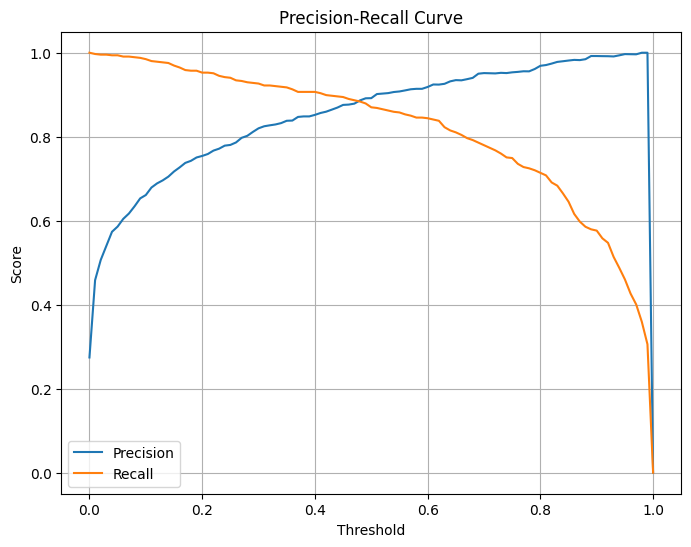

In [ ]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88


---
Answer Q.3

---
**0.48**



Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [ ]:
accuracy, predictions, predict_probabilities = train_logistic_model(X_train, X_val, X_test, y_train, y_val, y_test, solver="liblinear", C=1.0, max_iter=1000, evaluation_on="valid")

In [ ]:
# Initialize a list to store F1 scores
f1_scores = []
thresholds = np.arange(0, 1.01, 0.01)

# Compute F1 score at different thresholds
for threshold in thresholds:
    predictions = (predict_probabilities >= threshold).astype(int)[:, 1]  # Convert probabilities to binary predictions
    f1 = f1_score(y_val, predictions)
    f1_scores.append(f1)

# Find the threshold with the highest F1 score
best_f1_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print("Threshold with the highest F1 score:", best_f1_threshold)
print("Best F1 score:", best_f1_score)

Threshold with the highest F1 score: 0.49
Best F1 score: 0.8852963818321786


At which threshold F1 is maximal?

* 0.12
* 0.32
* 0.52
* 0.72


---
Answer Q.4

---

**0.49 (~0.52)**


Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

***KFold(n_splits=5, shuffle=True, random_state=1)***

* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: ***LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)***
* Use AUC to evaluate the model on validation

In [ ]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_full_train = df_train["above_average"].values
y_full_test = df_test["above_average"].values

In [ ]:
del df_train["price"]
del df_train["above_average"]

del df_test["price"]
del df_test["above_average"]

In [ ]:
X_full_train, X_full_val = one_hot_encoding(df_train, df_test)

In [ ]:
def perform_kfold(n_splits, shuffle, random_state,solver, C, max_iter, df_full_train):
  # Initialize KFold with 5 folds, shuffling the data and setting random_state for reproducibility
  kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

  # Initialize a list to store AUC scores for each fold
  auc_scores = []
  auc_ls = []
  # Iterate over different folds
  for train_idx, val_idx in kf.split(df_full_train):
      # Split the data into train and validation sets
      X_train, X_val = X_full_train[train_idx], X_full_train[val_idx]
      y_train, y_val = y_full_train[train_idx], y_full_train[val_idx]

      # Initialize and train the Logistic Regression model
      model = LogisticRegression(solver=solver, C=C, max_iter=max_iter)
      model.fit(X_train, y_train)

      # Make predictions on the validation set
      val_predictions = model.predict_proba(X_val)[:, 1]  # Predict probabilities of class 1

      # Calculate AUC score for this fold
      auc = roc_auc_score(y_val, val_predictions)
      auc_scores.append(auc)
      # auc_ls.append(accuracy_score(y_val, val_predictions))
  # Calculate and print the standard deviation of AUC scores
  std_dev = np.std(auc_scores)
  mean_auc = np.average(auc_scores)

  print(f"C value: {C}")
  print(f"Mean of AUC Scores: {round(mean_auc,3)}")
  print(f"Standard Deviation of AUC Scores: {round(std_dev,3)}")
  print()

In [ ]:
perform_kfold(5, True, 1, "liblinear", 1.0, 1000, df_full_train)

C value: 1.0
Mean of AUC Scores: 0.979
Standard Deviation of AUC Scores: 0.003



How large is standard devidation of the scores across different folds?

* 0.003
* 0.030
* 0.090
* 0.140

---
Answer Q.5

---
**0.003**



Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: **[0.01, 0.1, 0.5, 10]**
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: **LogisticRegression(solver='liblinear', C=C, max_iter=1000)**
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [ ]:
for C in [0.01, 0.1, 0.5, 10]:
  perform_kfold(5, True, 1, "liblinear", C, 1000, df_full_train)

C value: 0.01
Mean of AUC Scores: 0.952
Standard Deviation of AUC Scores: 0.002

C value: 0.1
Mean of AUC Scores: 0.972
Standard Deviation of AUC Scores: 0.002

C value: 0.5
Mean of AUC Scores: 0.981
Standard Deviation of AUC Scores: 0.002

C value: 10
Mean of AUC Scores: 0.982
Standard Deviation of AUC Scores: 0.003



Which C leads to the best mean score?

* 0.01
* 0.1
* 0.5
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.


---

Answer Q.6

---
**10**
